In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [15]:
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\germany-cars-zenrows.csv")

df

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011
...,...,...,...,...,...,...,...,...,...
46400,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46401,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46402,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46403,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021


In [16]:
## Removing any duplicates from the data

df = df.drop_duplicates()

df

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011
...,...,...,...,...,...,...,...,...,...
46394,10,Citroen,C1,Gasoline,Manual,Pre-registered,12340,72.0,2021
46396,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12490,71.0,2021
46397,550,Fiat,500,Electric/Gasoline,Manual,Demonstration,12805,69.0,2021
46398,837,Fiat,Panda,Electric/Gasoline,Manual,Demonstration,12805,69.0,2021


#### we removed 2140 duplicate rows

In [17]:
## checking the data types of the columns

df.dtypes

mileage        int64
make          object
model         object
fuel          object
gear          object
offerType     object
price          int64
hp           float64
year           int64
dtype: object

In [18]:
## Sorting the Data by the Price

df.sort_values(by=["price"], ascending = False)



,mileage,make,model,fuel,gear,offerType,price,hp,year
21675,431,Ferrari,F12,Gasoline,Automatic,Used,1199900,775.0,2017
11754,90,Mercedes-Benz,S 650,Gasoline,Automatic,Used,717078,630.0,2019
11753,90,Maybach,Pullman,Gasoline,Automatic,Used,717078,630.0,2019
16429,3400,Maybach,Pullman,Gasoline,Automatic,Used,499800,530.0,2018
29257,350,Mercedes-Benz,SLS,Gasoline,Automatic,Used,465000,591.0,2015
...,...,...,...,...,...,...,...,...,...
24365,133000,Opel,Corsa,Gasoline,Manual,Used,1300,69.0,2012
17811,222000,Peugeot,206,Diesel,Manual,Used,1299,68.0,2011
23487,153000,Toyota,Aygo,Gasoline,Manual,Used,1250,68.0,2012
17155,100611,Lada,Priora,Gasoline,Manual,Used,1190,98.0,2011


In [14]:
## Checking out all the years that are mentioned in the data

df["year"].drop_duplicates().sort_values(ascending=False)

#df["offerType"].drop_duplicates().sort_values(ascending=False)

194    2021
175    2020
155    2019
135    2018
116    2017
97     2016
79     2015
60     2014
40     2013
20     2012
0      2011
Name: year, dtype: int64

### Scatter Plot

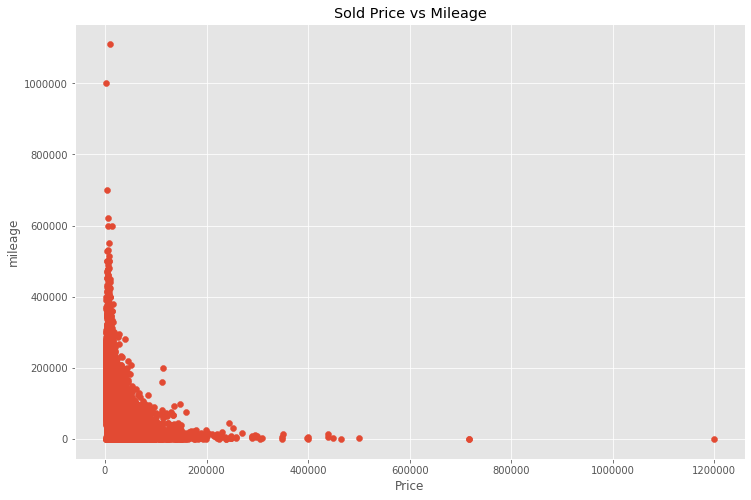

In [21]:
plt.scatter(x=df["price"], y=df["mileage"])
plt.title("Sold Price vs Mileage")
plt.xlabel("Price")
plt.ylabel("mileage")
plt.show()

### Die Kurve regressieren

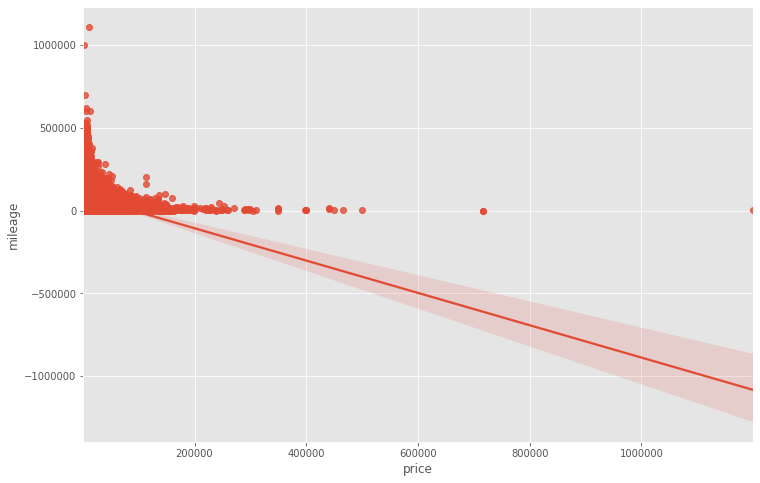

In [24]:
sns.regplot(x="price", y="mileage", data=df)

#### The correlation is negative, that means that with one value increasing the other decreases, which makes sense.
#### The less the mileage, the higher the price and vice versa

### Regressing the Horsepower and The Price

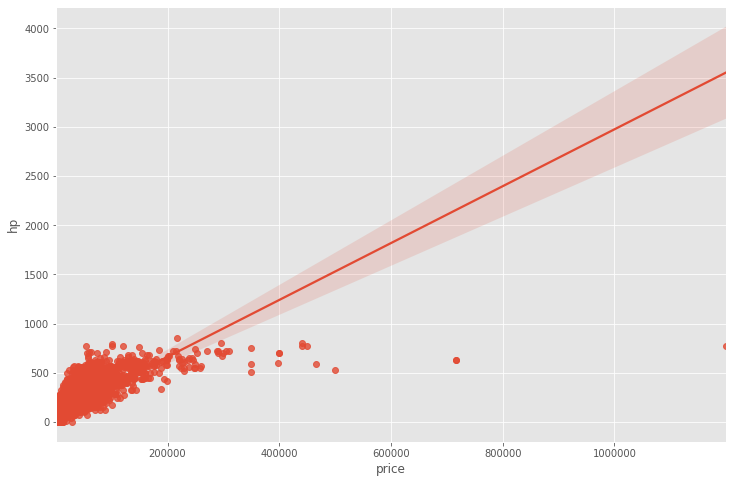

In [28]:
sns.regplot(x="price", y="hp", data=df)

### The correlation between the Price and Horsepower is positive, the higher the Horsepower, the higher the Price

In [27]:
## Checking the Correlation matrix of the numerical values

df.corr()

,mileage,price,hp,year
mileage,1.000000,-0.304816,-0.022834,-0.668721
price,-0.304816,1.000000,0.745647,0.411286
hp,-0.022834,0.745647,1.000000,0.181901
year,-0.668721,0.411286,0.181901,1.000000


## Since the non numerical (object) Values in the data cannot be included in the correlation matrix, what we can do is transform them into numerical values and then try the correlation matrix again

In [31]:
## transforming the object values with the cat codes method
df_numerical = df

for col in df_numerical.columns:
    if df_numerical[col].dtype == "object":
        df_numerical[col] = df_numerical[col].astype("category")
        df_numerical[col] = df_numerical[col].cat.codes

df_numerical

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,8,33,2,1,4,6800,116.0,2011
1,92800,73,397,7,1,4,6877,122.0,2011
2,149300,63,324,7,1,4,6900,160.0,2011
3,96200,61,509,7,1,4,6950,110.0,2011
4,156000,56,32,7,1,4,6950,156.0,2011
...,...,...,...,...,...,...,...,...,...
46394,10,16,179,7,1,3,12340,72.0,2021
46396,99,28,54,5,1,3,12490,71.0,2021
46397,550,28,54,5,1,0,12805,69.0,2021
46398,837,28,556,5,1,0,12805,69.0,2021


In [33]:
correlation_matrix = df_numerical.corr()
correlation_matrix

,mileage,make,model,fuel,gear,offerType,price,hp,year
mileage,1.000000,-0.019699,-0.065671,-0.377943,0.094284,0.343473,-0.304816,-0.022834,-0.668721
make,-0.019699,1.000000,0.308311,0.060566,0.066549,0.010340,-0.119129,-0.231025,-0.016209
model,-0.065671,0.308311,1.000000,-0.000825,-0.055567,-0.031192,0.027179,-0.030111,0.043086
fuel,-0.377943,0.060566,-0.000825,1.000000,0.245000,-0.046238,-0.078847,-0.189197,0.054697
gear,0.094284,0.066549,-0.055567,0.245000,1.000000,0.127766,-0.414968,-0.505220,-0.241745
offerType,0.343473,0.010340,-0.031192,-0.046238,0.127766,1.000000,-0.266266,-0.117046,-0.458876
price,-0.304816,-0.119129,0.027179,-0.078847,-0.414968,-0.266266,1.000000,0.745647,0.411286
hp,-0.022834,-0.231025,-0.030111,-0.189197,-0.505220,-0.117046,0.745647,1.000000,0.181901
year,-0.668721,-0.016209,0.043086,0.054697,-0.241745,-0.458876,0.411286,0.181901,1.000000


Text(0.5, 1, 'Correlation Matrix')

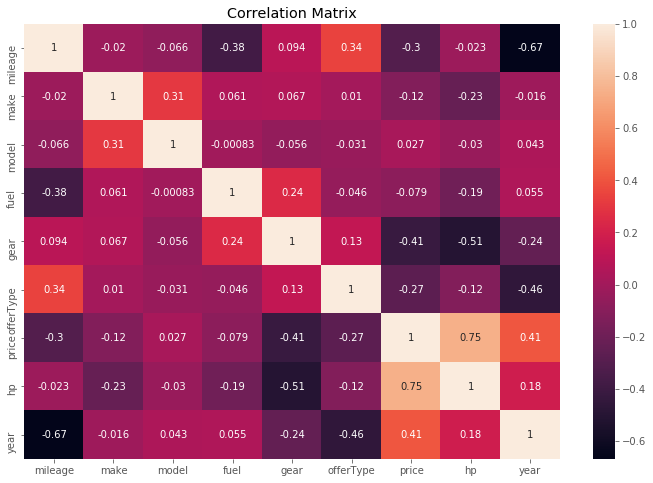

In [36]:
# making it look a bit easier on the eye

sns.heatmap(correlation_matrix, annot=True)

plt.title("Correlation Matrix")


#### Finding out the highest correlations

In [39]:
corr_pairs = correlation_matrix.unstack()
corr_pairs

mileage  mileage      1.000000
         make        -0.019699
         model       -0.065671
         fuel        -0.377943
         gear         0.094284
                        ...   
year     gear        -0.241745
         offerType   -0.458876
         price        0.411286
         hp           0.181901
         year         1.000000
Length: 81, dtype: float64

In [42]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

year       mileage   -0.668721
mileage    year      -0.668721
gear       hp        -0.505220
hp         gear      -0.505220
offerType  year      -0.458876
                        ...   
fuel       fuel       1.000000
model      model      1.000000
make       make       1.000000
hp         hp         1.000000
year       year       1.000000
Length: 81, dtype: float64

In [46]:
high_correlation = sorted_pairs[(sorted_pairs) > 0.4]
high_correlation

price      year         0.411286
year       price        0.411286
price      hp           0.745647
hp         price        0.745647
mileage    mileage      1.000000
gear       gear         1.000000
price      price        1.000000
offerType  offerType    1.000000
fuel       fuel         1.000000
model      model        1.000000
make       make         1.000000
hp         hp           1.000000
year       year         1.000000
dtype: float64

## The Highest 2 Correlations are : {(Price;Year);(Horsepower;Year)}